In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)

pd.options.display.float_format = '{:.2f}'.format
from random import randint
from sklearn import preprocessing

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, auc, roc_curve, recall_score, f1_score, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.metrics import confusion_matrix as cm
from matplotlib.legend_handler import HandlerLine2D

df = pd.read_csv("accidents_2012_to_2014.csv", low_memory=False)

In [2]:

df.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.17,51.49,1,3,2,1,19/01/2012,5,20:35,12,E09000020,3,308,Single carriageway,30,NaN,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.20,51.52,1,3,2,1,04/01/2012,4,17:00,1,E09000033,4,412,Single carriageway,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.19,51.49,1,3,2,1,10/01/2012,3,10:07,12,E09000020,3,3220,One way street,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.20,51.51,1,3,1,1,18/01/2012,4,12:20,12,E09000020,5,0,Single carriageway,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.18,51.50,1,3,1,1,17/01/2012,3,20:24,12,E09000020,4,325,Single carriageway,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012
5,201201BS70006,526090,177600,-0.19,51.48,1,3,2,1,19/01/2012,5,07:30,12,E09000020,3,308,Single carriageway,30,NaN,Automatic traffic signal,3,3220,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002912,2012
6,201201BS70007,527780,179680,-0.16,51.50,1,3,1,1,12/01/2012,5,14:00,1,E09000033,3,3216,Single carriageway,30,NaN,Automatic traffic signal,3,4,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002818,2012
7,201201BS70008,524010,182080,-0.21,51.52,1,3,2,1,07/01/2012,7,11:29,12,E09000020,4,450,Roundabout,30,NaN,Giveway or uncontrolled,5,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002905,2012
8,201201BS70010,527710,179290,-0.16,51.50,1,3,2,1,07/01/2012,7,13:55,12,E09000020,6,0,One way street,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01002818,2012
9,201201BS70011,525120,180060,-0.20,51.51,1,3,2,1,04/01/2012,4,19:40,12,E09000020,5,0,Single carriageway,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002825,2012


In [3]:
df = df.drop(columns=[
    'Accident_Index',
    'Special_Conditions_at_Site',
    'Carriageway_Hazards',
    'Junction_Detail',
    'LSOA_of_Accident_Location',
    'Location_Easting_OSGR',
    'Location_Northing_OSGR',
    '1st_Road_Class',
    '1st_Road_Number',
    '2nd_Road_Class',
    '2nd_Road_Number'
])

In [4]:
print(df.Accident_Severity.value_counts())

3    392610
2     66784
1      5303
Name: Accident_Severity, dtype: int64


In [5]:
df

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.17,51.49,1,3,2,1,19/01/2012,5,20:35,12,E09000020,Single carriageway,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
1,-0.20,51.52,1,3,2,1,04/01/2012,4,17:00,1,E09000033,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
2,-0.19,51.49,1,3,2,1,10/01/2012,3,10:07,12,E09000020,One way street,30,Giveway or uncontrolled,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
3,-0.20,51.51,1,3,1,1,18/01/2012,4,12:20,12,E09000020,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
4,-0.18,51.50,1,3,1,1,17/01/2012,3,20:24,12,E09000020,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,-3.42,55.26,98,2,2,1,07/12/2014,1,22:20,917,S12000006,Dual carriageway,70,NaN,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,2,Yes,2014
464693,-3.23,55.05,98,3,2,2,11/12/2014,5,06:40,917,S12000006,Dual carriageway,70,NaN,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,2,Yes,2014
464694,-3.23,54.99,98,3,1,1,09/12/2014,3,02:00,917,S12000006,Single carriageway,40,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,2,Yes,2014
464695,-3.19,54.99,98,2,3,2,17/12/2014,4,06:55,917,S12000006,Single carriageway,60,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2,Yes,2014


# How many classes are there in variables?
-------------------------------
Number of Classes < 10: ['Accident_Severity', 'Day_of_Week', 'Road_Type', 'Speed_limit', 'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Year']
Number of Classes >= 10: ['Longitude', 'Latitude', 'Police_Force', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)'] 


# Which variables are object variables that number of classes is more than 10?
-------------------------------
Number of Classes > 10: ['Date', 'Time', 'Local_Authority_(Highway)'] 


# Number of Unique Classes
-------------------------------
Longitude ( float64 ): 384094
Latitude ( float64 ): 374558
Police_Force ( int64 ): 51
Accident_Severity ( int64 ): 3
Number_of_Vehicles ( int64 ): 18
Numbe

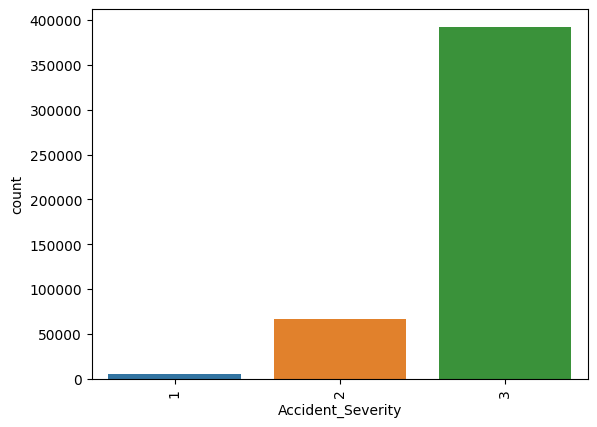

#----------------------------- 

   Day_of_Week  Ratio
6        76054  16.37
5        70644  15.20
3        70316  15.13
4        69835  15.03
2        66725  14.36
7        60819  13.09
1        50304  10.83




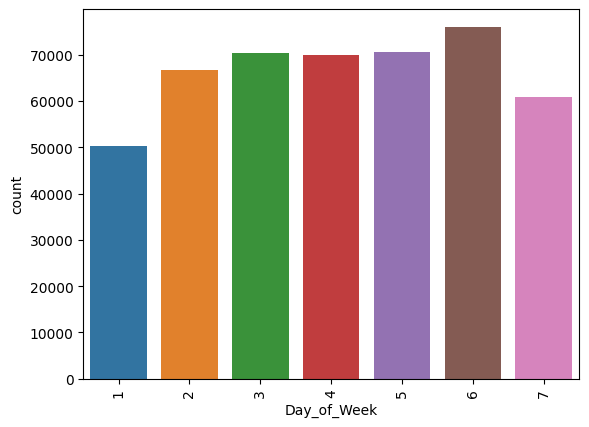

#----------------------------- 

                    Road_Type  Ratio
Single carriageway     351268  75.59
Dual carriageway        65998  14.20
Roundabout              31852   6.85
One way street           9074   1.95
Slip road                4827   1.04
Unknown                  1678   0.36




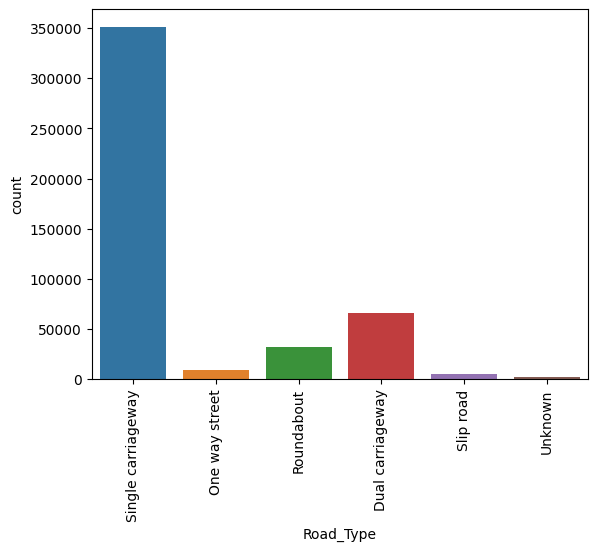

#----------------------------- 

    Speed_limit  Ratio
30       304842  65.60
60        64465  13.87
40        37538   8.08
70        31484   6.78
50        17312   3.73
20         9055   1.95
10            1   0.00




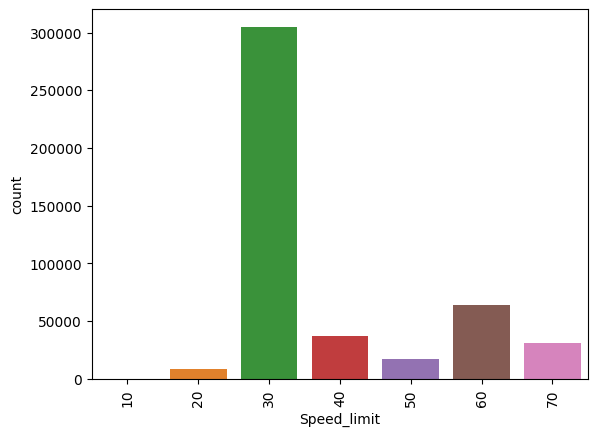

#----------------------------- 

                          Junction_Control  Ratio
Giveway or uncontrolled             232915  50.12
Automatic traffic signal             50208  10.80
Stop Sign                             2287   0.49
Authorised person                      677   0.15




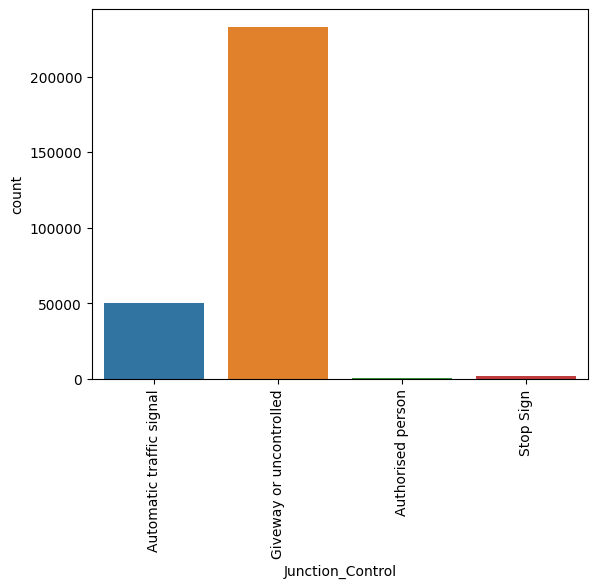

#----------------------------- 

                                    Pedestrian_Crossing-Human_Control  Ratio
None within 50 metres                                          462133  99.45
Control by other authorised person                               1468   0.32
Control by school crossing patrol                                1096   0.24




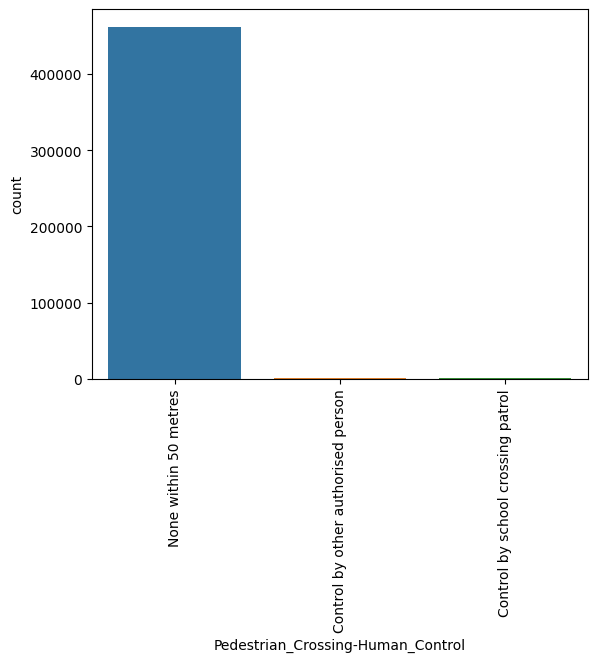

#----------------------------- 

                                             Pedestrian_Crossing-Physical_Facilities  \
No physical crossing within 50 meters                                         377099   
Pedestrian phase at traffic signal junction                                    35165   
non-junction pedestrian crossing                                               26572   
Zebra crossing                                                                 14012   
Central refuge                                                                 10369   
Footbridge or subway                                                            1480   

                                             Ratio  
No physical crossing within 50 meters        81.15  
Pedestrian phase at traffic signal junction   7.57  
non-junction pedestrian crossing              5.72  
Zebra crossing                                3.02  
Central refuge                                2.23  
Footbridge or subway            

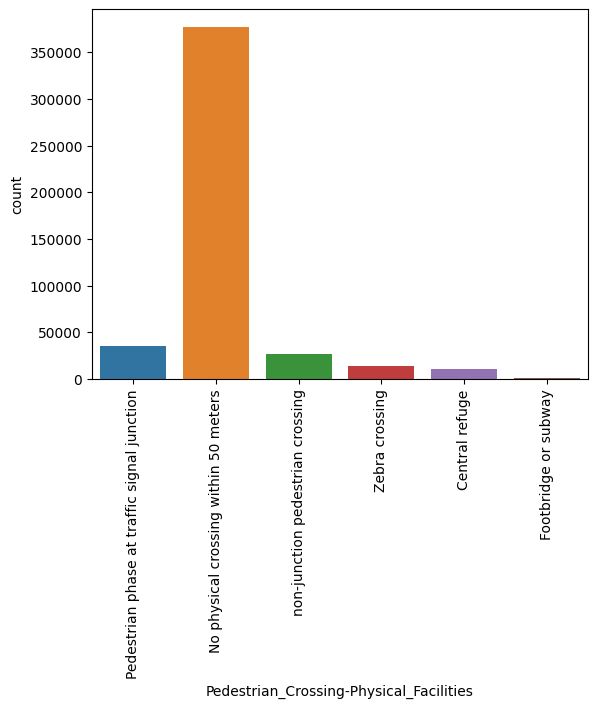

#----------------------------- 

                                           Light_Conditions  Ratio
Daylight: Street light present                       341124  73.41
Darkness: Street lights present and lit               91158  19.62
Darkeness: No street lighting                         22999   4.95
Darkness: Street lighting unknown                      6853   1.47
Darkness: Street lights present but unlit              2563   0.55




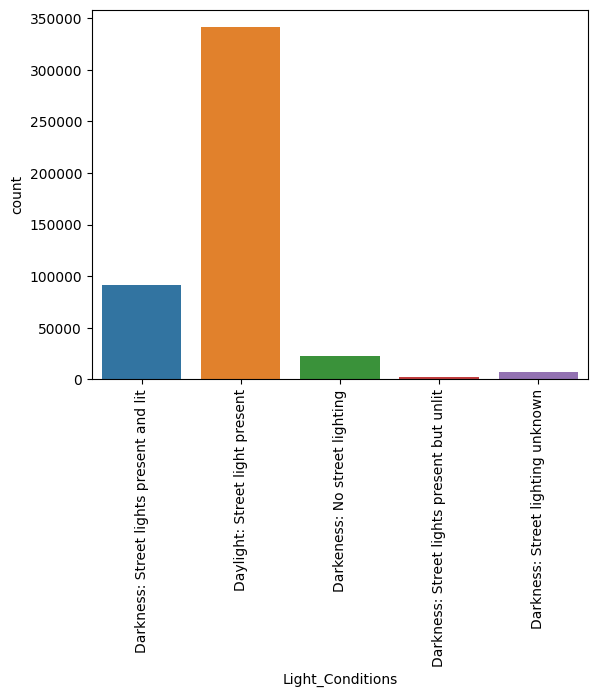

#----------------------------- 

                            Weather_Conditions  Ratio
Fine without high winds                 373167  80.30
Raining without high winds               57060  12.28
Other                                     8272   1.78
Unknown                                   8215   1.77
Raining with high winds                   7120   1.53
Fine with high winds                      5011   1.08
Snowing without high winds                2708   0.58
Fog or mist                               2411   0.52
Snowing with high winds                    733   0.16




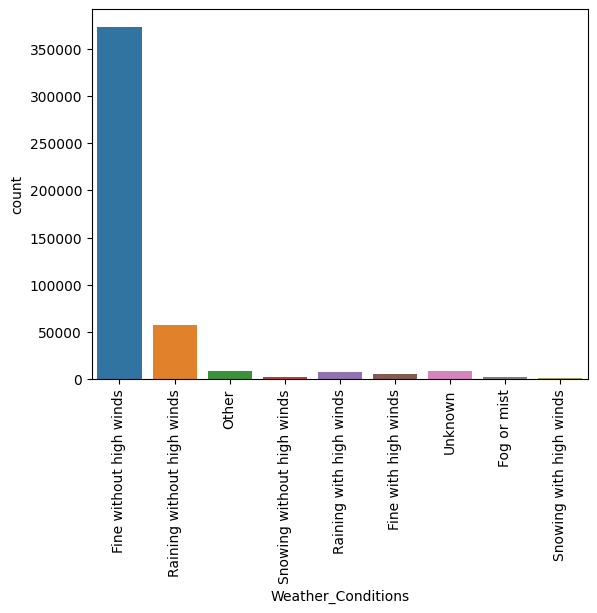

#----------------------------- 

                           Road_Surface_Conditions  Ratio
Dry                                         319370  68.73
Wet/Damp                                    132745  28.57
Frost/Ice                                     8140   1.75
Snow                                          2824   0.61
Flood (Over 3cm of water)                      863   0.19




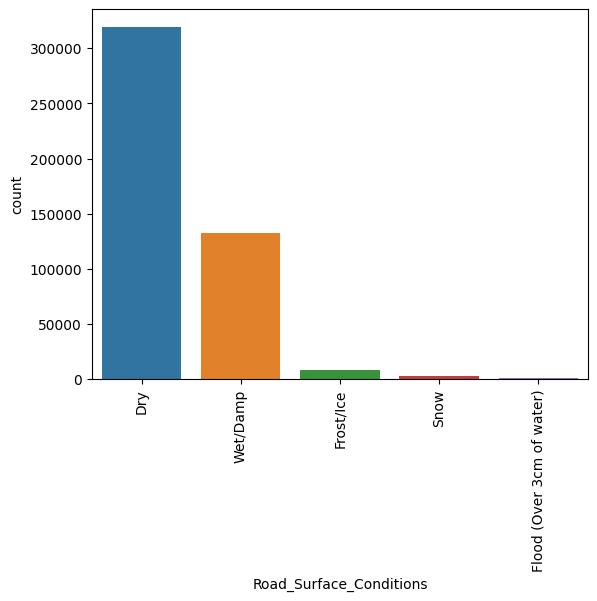

#----------------------------- 

   Urban_or_Rural_Area  Ratio
1               307896  66.26
2               156801  33.74




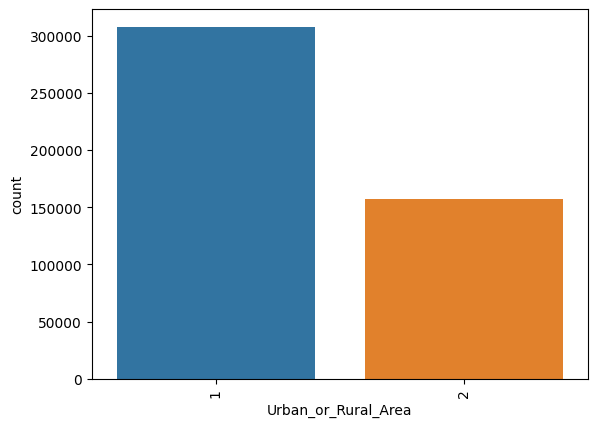

#----------------------------- 

     Did_Police_Officer_Attend_Scene_of_Accident  Ratio
Yes                                       380850  81.96
No                                         83845  18.04




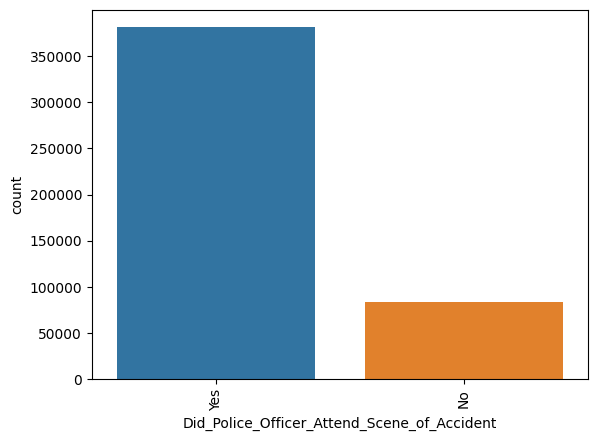

#----------------------------- 

        Year  Ratio
2012  179715  38.67
2014  146322  31.49
2013  138660  29.84




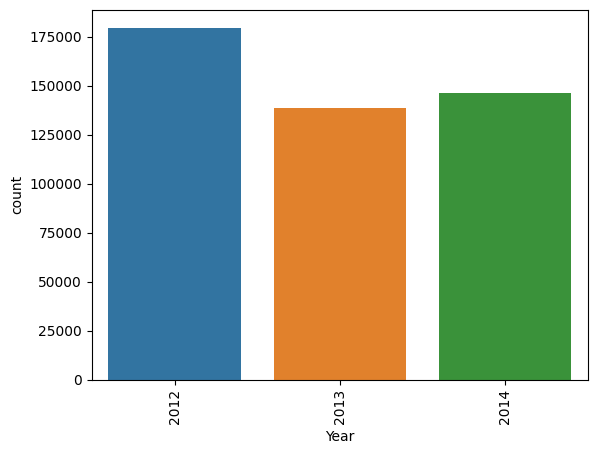

#----------------------------- 



In [6]:
def cat_summary(data, cat_length, plot = False):

    print("# How many classes are there in variables?")
    print("-------------------------------")
    
    cat_names_less = [col for col in data.columns if len(data[col].unique()) < cat_length]
    cat_names_more = [col for col in data.columns if len(data[col].unique()) >= cat_length]
    print('Number of Classes <', str(cat_length) + ":", cat_names_less)
    print('Number of Classes >=', str(cat_length) + ":", cat_names_more, "\n\n")
    
    print("# Which variables are object variables that number of classes is more than", str(cat_length) + "?")
    print("-------------------------------")
    object_variables = [col for col in cat_names_more if data[col].dtype == "O"]
    more = [col for col in object_variables if len(data[col].unique()) >= cat_length]
    print('Number of Classes >', str(cat_length) + ":", more, "\n\n")
    
    print("# Number of Unique Classes")
    print("-------------------------------")
    for  i in data.columns:
        print(i, "(",str(data[i].dtypes),"):",data[i].nunique())
    print("\n\n")
    
    
    if plot:
        print("# Stats & Visualization")
    else:
        print("# Stats")
    print("--------------------------------")
    
    for col in cat_names_less:
        print(pd.DataFrame({col: data[col].value_counts(),
                           "Ratio": 100 * data[col].value_counts()/ len (data)}), end = "\n\n\n")
        
        if plot:
            chart = sns.countplot(x = col, data = data)
            chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
            plt.show()
            
        print("#----------------------------- \n")
          
    


    
cat_summary(df, cat_length = 10, plot = True)

In [7]:
df = df.dropna()

# Histogram & Boxplot 



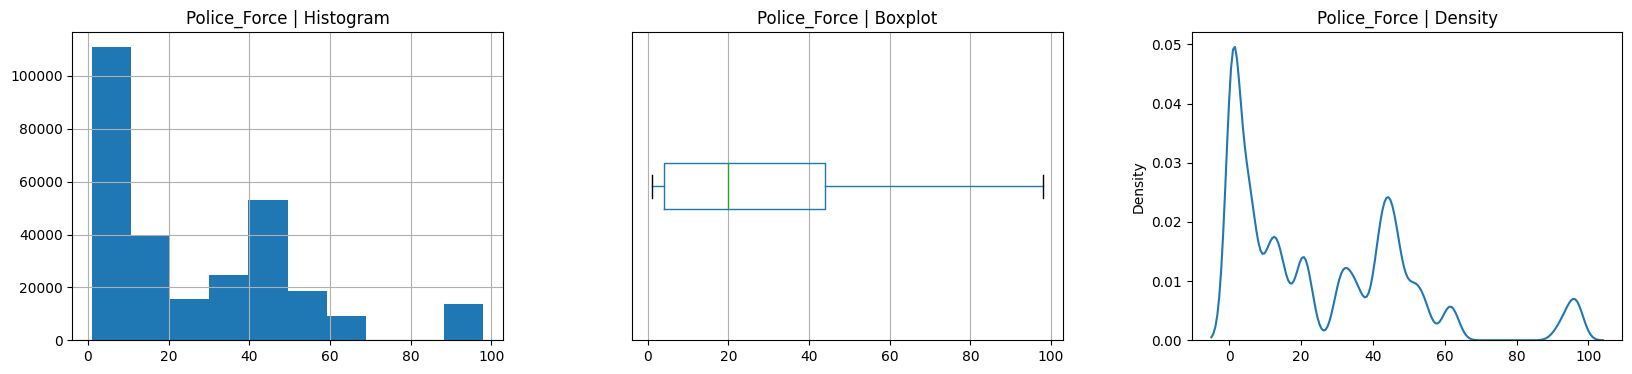

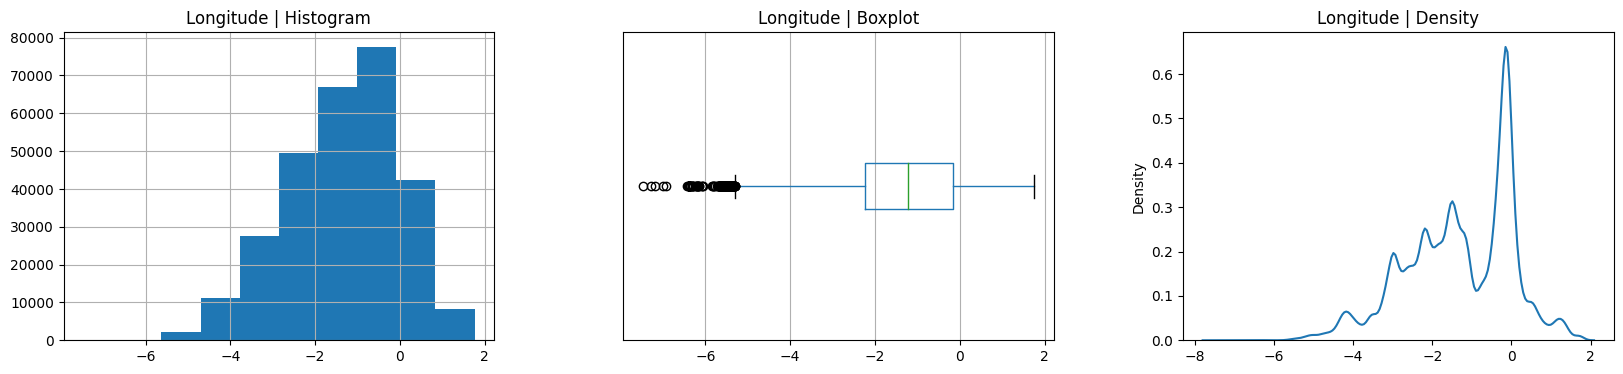

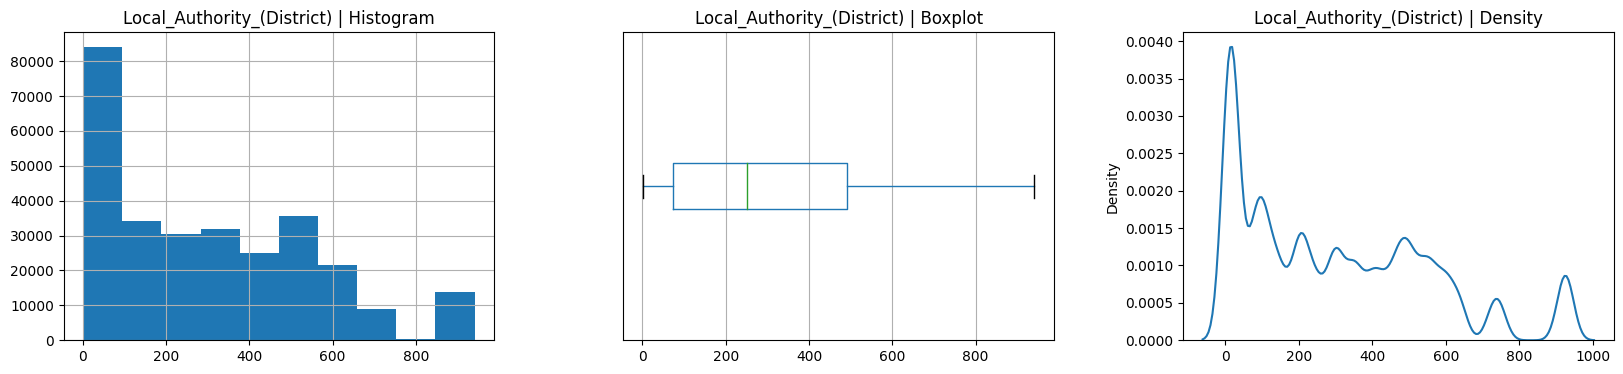

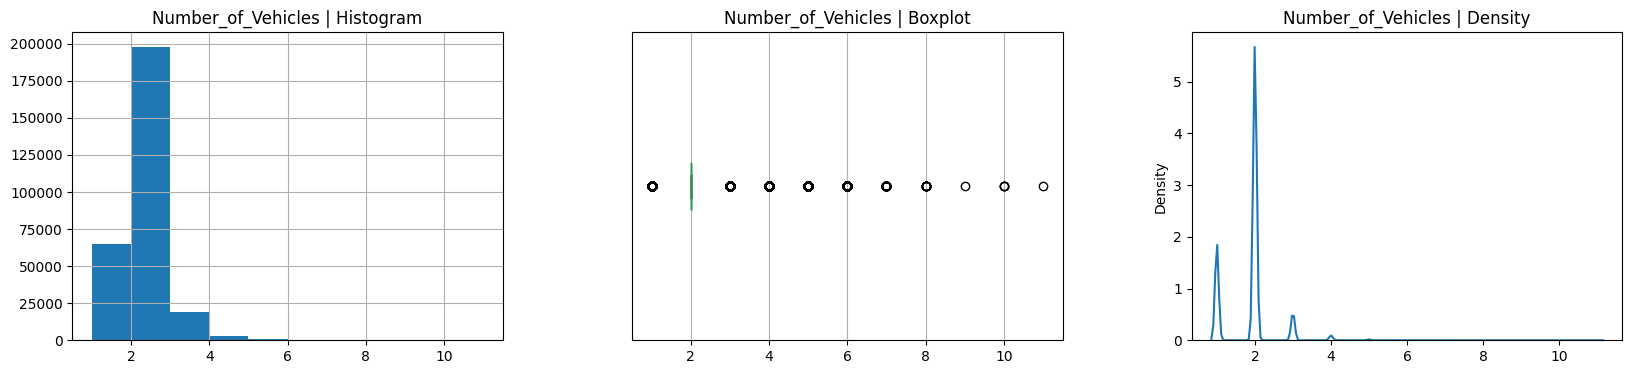

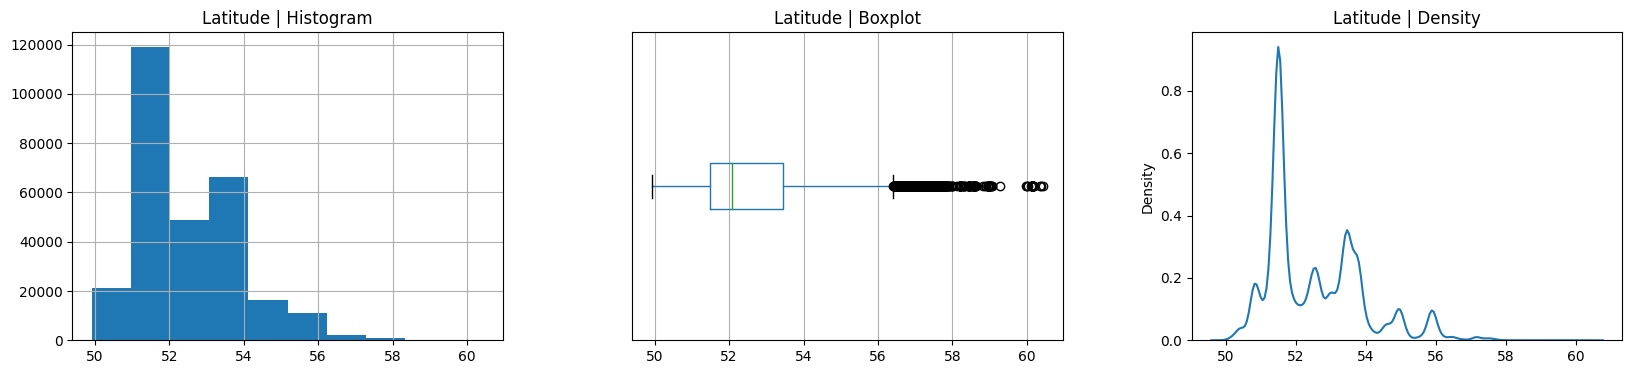

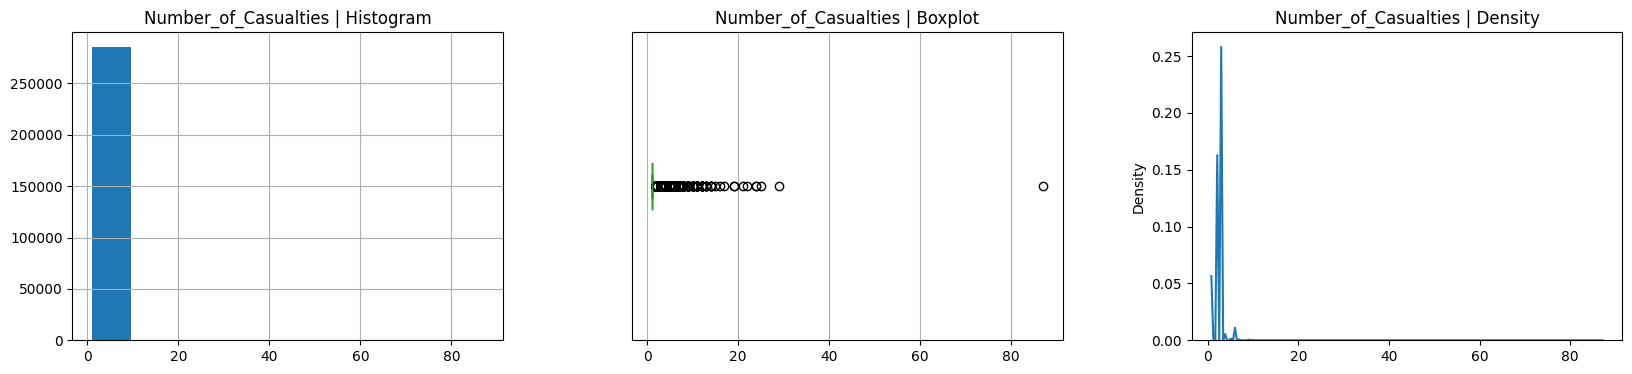

In [8]:
def num_plot(data, cat_length = 10, remove = ["Id"], hist_bins = 10, figsize = (20,4)):
    
    num_cols = [col for col in data.columns if df[col].dtypes != "O" 
                and len(data[col].unique()) >= cat_length]
    
    if len(remove) > 0:
        num_cols = list(set(num_cols).difference(remove))
        
    print("# Histogram & Boxplot \n")    
    for i in num_cols:
        fig, axes = plt.subplots(1, 3, figsize = figsize)
        data.hist(str(i), bins = hist_bins, ax=axes[0])
        data.boxplot(str(i),  ax=axes[1], vert=False);
        try: 
            sns.kdeplot(np.array(data[str(i)]))
        except: ValueError
        
        axes[1].set_yticklabels([])
        axes[1].set_yticks([])
        axes[0].set_title(i + " | Histogram")
        axes[1].set_title(i + " | Boxplot")
        axes[2].set_title(i + " | Density")
        plt.show()
        
        
num_plot(df, cat_length = 10, remove = ["Id"], hist_bins = 10, figsize = (20,4))

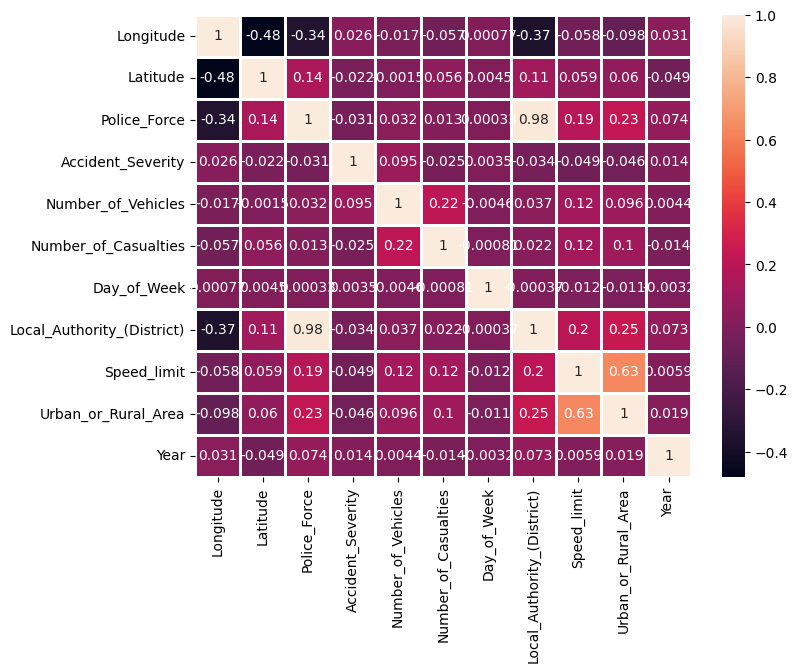

In [10]:
fig, ax= plt.subplots(figsize=(8,6)) 
sns.heatmap(df.corr(), annot=True, linewidths=1, ax=ax, xticklabels=True, yticklabels=True);

<AxesSubplot: xlabel='Accident_Severity', ylabel='Number_of_Vehicles'>

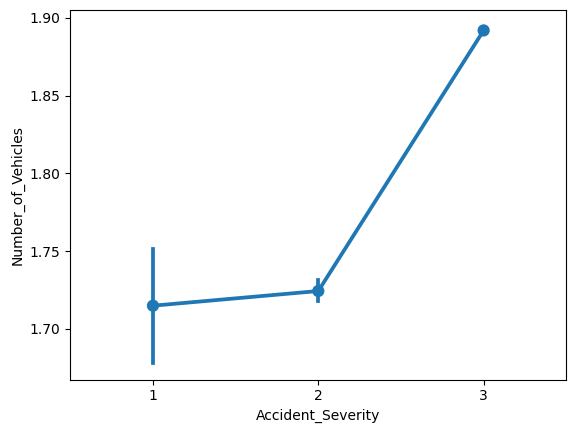

In [11]:
sns.pointplot(x= 'Accident_Severity', y='Number_of_Vehicles', data=df)

<AxesSubplot: xlabel='Accident_Severity', ylabel='Number_of_Casualties'>

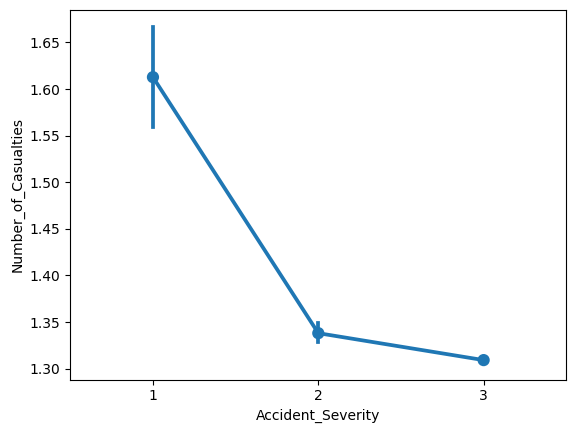

In [12]:
sns.pointplot(x= 'Accident_Severity', y='Number_of_Casualties', data=df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285628 entries, 0 to 464696
Data columns (total 22 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Longitude                                    285628 non-null  float64
 1   Latitude                                     285628 non-null  float64
 2   Police_Force                                 285628 non-null  int64  
 3   Accident_Severity                            285628 non-null  int64  
 4   Number_of_Vehicles                           285628 non-null  int64  
 5   Number_of_Casualties                         285628 non-null  int64  
 6   Date                                         285628 non-null  object 
 7   Day_of_Week                                  285628 non-null  int64  
 8   Time                                         285628 non-null  object 
 9   Local_Authority_(District)                   285628 non-nul

In [14]:
df["Time"].unique()

array(['20:35', '17:00', '10:07', ..., '04:18', '04:19', '04:33'],
      dtype=object)

In [15]:
df["Date"].unique()

array(['19/01/2012', '04/01/2012', '10/01/2012', ..., '28/12/2014',
       '06/07/2014', '27/09/2014'], dtype=object)

In [16]:
df["Local_Authority_(Highway)"].unique()

array(['E09000020', 'E09000033', 'E09000013', 'E09000005', 'E09000001',
       'E09000019', 'E09000030', 'E09000012', 'E09000028', 'E09000007',
       'E09000003', 'E09000014', 'E09000009', 'E09000018', 'E09000025',
       'EHEATHROW', 'E09000017', 'E09000031', 'E09000026', 'E09000002',
       'E09000016', 'E09000022', 'E09000008', 'E09000006', 'E09000032',
       'E09000027', 'E09000024', 'E09000023', 'E09000011', 'E09000004',
       'E09000015', 'E09000010', 'E09000021', 'E09000029', 'E10000006',
       'E10000017', 'E06000009', 'E06000008', 'E08000014', 'E08000012',
       'E08000011', 'E08000015', 'E08000013', 'E08000003', 'E08000006',
       'E08000008', 'E08000007', 'E08000001', 'E08000010', 'E08000009',
       'E08000002', 'E08000005', 'E08000004', 'E06000050', 'E06000049',
       'E06000007', 'E06000006', 'E06000048', 'E08000022', 'E08000021',
       'E08000024', 'E08000020', 'E08000023', 'E06000047', 'E06000005',
       'E10000023', 'E06000014', 'E08000035', 'E08000032', 'E080

In [17]:
df["Road_Type"].unique()

array(['Single carriageway', 'One way street', 'Roundabout',
       'Dual carriageway', 'Slip road', 'Unknown'], dtype=object)

In [18]:
df["Pedestrian_Crossing-Human_Control"].unique()

array(['None within 50 metres', 'Control by other authorised person',
       'Control by school crossing patrol'], dtype=object)

In [19]:
df["Pedestrian_Crossing-Physical_Facilities"].unique()


array(['Pedestrian phase at traffic signal junction',
       'No physical crossing within 50 meters',
       'non-junction pedestrian crossing', 'Zebra crossing',
       'Central refuge', 'Footbridge or subway'], dtype=object)

In [20]:
df["Light_Conditions"].unique()

array(['Darkness: Street lights present and lit',
       'Daylight: Street light present', 'Darkeness: No street lighting',
       'Darkness: Street lights present but unlit',
       'Darkness: Street lighting unknown'], dtype=object)

In [21]:
df["Weather_Conditions"].unique()

array(['Fine without high winds', 'Raining without high winds', 'Other',
       'Snowing without high winds', 'Raining with high winds',
       'Fine with high winds', 'Unknown', 'Fog or mist',
       'Snowing with high winds'], dtype=object)

In [22]:
df["Did_Police_Officer_Attend_Scene_of_Accident"].unique()

array(['Yes', 'No'], dtype=object)

In [23]:
f = df.drop(columns=["Local_Authority_(District)"])

In [24]:
df = df.drop(columns=["Date"])

In [25]:
df = df.drop(columns=["Time"])


In [26]:
df = df.drop(columns=["Local_Authority_(Highway)"])

In [27]:
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.17,51.49,1,3,2,1,5,12,Single carriageway,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
1,-0.20,51.52,1,3,2,1,4,1,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
2,-0.19,51.49,1,3,2,1,3,12,One way street,30,Giveway or uncontrolled,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
3,-0.20,51.51,1,3,1,1,4,12,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
4,-0.18,51.50,1,3,1,1,3,12,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
